# Bosonic SSH model

## Libraries

In [89]:
from quspin.basis import boson_basis_1d
from quspin.operators import hamiltonian
import numpy as np
import matplotlib.pyplot as plt
import os

# suppress warnings
# Suppress stdout
import sys
stdout_backup = sys.stdout
sys.stdout = open(os.devnull, 'w')

In [90]:
images_dir = os.path.join(os.getcwd(), "figures")
os.makedirs(images_dir, exist_ok=True)

img_w, img_h = 3.6, 2.6 # set image width and height (img are exported with dpi=300)

## Hamiltonian

In [91]:
def bosonic_ssh_hamiltonian(*, L, J, deltaJ, U, Nbosons, sps, BC):
    # Construct hopping terms with staggered amplitudes (SSH model)
    # For site i, hopping amplitude alternates as J + (-1)^i * deltaJ
    if BC.upper() == "PBC":
        # Periodic Boundary Conditions: hopping connects site i to (i+1) mod L
        hop_list = [[- (J + (-1)**i * deltaJ), i, (i+1) % L] for i in range(L)]
    elif BC.upper() == "OBC":
        # Open Boundary Conditions: hopping only between i and i+1 within lattice
        hop_list = [[- (J + (-1)**i * deltaJ), i, i+1] for i in range(L-1)]
    else:
        raise ValueError("BC must be 'PBC' or 'OBC'")
    
    # Onsite interaction terms representing U/2 * n_i (n_i - 1)
    # Split as U/2 * n_i^2  minus U/2 * n_i for implementation convenience
    
    # n_i^2 terms with coefficient U/2
    nn_list = [[U/2, i, i] for i in range(L)]
    # -n_i terms with coefficient -U/2
    n_list = [[-U/2, i] for i in range(L)]
    
    # Static terms in the Hamiltonian
    # " +- " and " -+ " correspond to hopping terms b_i^dag b_j and b_j^dag b_i
    # " nn " and " n " correspond to interaction terms as described above
    static = [
        ["+-", hop_list],  # hopping b_i^\dag b_j
        ["-+", hop_list],  # hopping b_j^\dag b_i (Hermitian conjugate)
        ["nn", nn_list],   # onsite interaction term: (U/2) * n_i^2
        ["n", n_list],     # onsite interaction term: (-U/2) * n_i
    ]
    
    dynamic = []  # No time-dependent terms
    
    # Define bosonic basis with L sites, fixed total boson number Nbosons, sps states per site
    basis = boson_basis_1d(L=L, Nb=Nbosons, sps=sps)
    
    # Build the Hamiltonian matrix with given basis and terms
    H = hamiltonian(static, dynamic, basis=basis, dtype=np.float64)
    
    return H, basis

## b) Ground-state symmetry

### OBC, even L

In [94]:
# parameters
L = 6
N = (L // 2)
deltaJs = np.linspace(-1, 1, 10)
U = 2
BC = "OBC"

# saving dict
E_gs = {}

for deltaJ in deltaJs:
    H, _ = bosonic_ssh_hamiltonian(L=L, J=1.0, deltaJ= deltaJ, U=U, Nbosons=N+1, sps=10, BC=BC)
    
    E, _ = H.eigh()
    
    E_gs[deltaJ] = E[0]

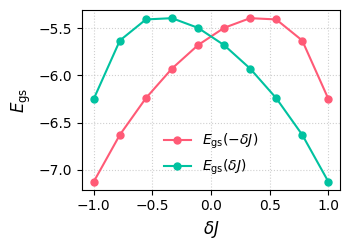

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(img_w, img_h))

# Mirrored data — lampone
plt.plot(
    [-dj for dj in deltaJs],
    [E_gs[dj] for dj in deltaJs],
    'o-',
    color='#FF5A76',  # raspberry
    label=r'$E_{\mathrm{gs}}(-\delta J)$',
    markersize=5,
    linewidth=1.5
)

# Original data — menta
plt.plot(
    deltaJs,
    [E_gs[dj] for dj in deltaJs],
    'o-',
    color='#00C2A0',  # mint
    label=r'$E_{\mathrm{gs}}(\delta J)$',
    markersize=5,
    linewidth=1.5
)

plt.xlabel(r'$\delta J$', fontsize=12)
plt.ylabel(r'$E_{\mathrm{gs}}$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(frameon=False, fontsize=10)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.savefig(f"{images_dir}/Egs_OBC_even.png", dpi=300)
plt.show()

### OBC, odd L

In [96]:
# parameters
L = 7
N = L // 2
deltaJs = np.linspace(-1, 1, 10)
U = 2
BC = "OBC"

# saving dict
E_gs = {}

for deltaJ in deltaJs:
    H, _ = bosonic_ssh_hamiltonian(L=L, J=1.0, deltaJ= deltaJ, U=U, Nbosons=N+1, sps=10, BC=BC)
    
    E, _ = H.eigh()
    
    E_gs[deltaJ] = E[0]

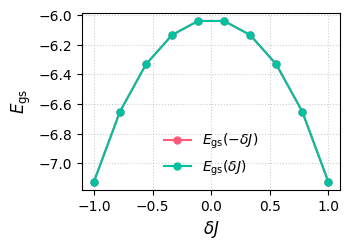

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(img_w, img_h))

# Mirrored data — lampone
plt.plot(
    [-dj for dj in deltaJs],
    [E_gs[dj] for dj in deltaJs],
    'o-',
    color='#FF5A76',  # raspberry
    label=r'$E_{\mathrm{gs}}(-\delta J)$',
    markersize=5,
    linewidth=1.5
)

# Original data — menta
plt.plot(
    deltaJs,
    [E_gs[dj] for dj in deltaJs],
    'o-',
    color='#00C2A0',  # mint
    label=r'$E_{\mathrm{gs}}(\delta J)$',
    markersize=5,
    linewidth=1.5
)

plt.xlabel(r'$\delta J$', fontsize=12)
plt.ylabel(r'$E_{\mathrm{gs}}$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(frameon=False, fontsize=10)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.savefig(f"{images_dir}/Egs_OBC_odd.png", dpi=300)
plt.show()

### PBC, even L

In [98]:
# parameters
L = 6
N = L // 2
deltaJs = np.linspace(-1, 1, 10)
U = 2
BC = "PBC"

# saving dict
E_gs = {}

for deltaJ in deltaJs:
    H, _ = bosonic_ssh_hamiltonian(L=L, J=1.0, deltaJ= deltaJ, U=U, Nbosons=N+1, sps=10, BC=BC)
    
    E, _ = H.eigh()
    
    E_gs[deltaJ] = E[0]

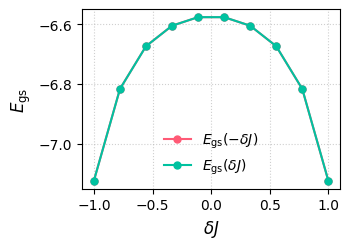

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(img_w, img_h))

# Mirrored data — lampone
plt.plot(
    [-dj for dj in deltaJs],
    [E_gs[dj] for dj in deltaJs],
    'o-',
    color='#FF5A76',  # raspberry
    label=r'$E_{\mathrm{gs}}(-\delta J)$',
    markersize=5,
    linewidth=1.5
)

# Original data — menta
plt.plot(
    deltaJs,
    [E_gs[dj] for dj in deltaJs],
    'o-',
    color='#00C2A0',  # mint
    label=r'$E_{\mathrm{gs}}(\delta J)$',
    markersize=5,
    linewidth=1.5
)

plt.xlabel(r'$\delta J$', fontsize=12)
plt.ylabel(r'$E_{\mathrm{gs}}$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(frameon=False, fontsize=10)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.savefig(f"{images_dir}/Egs_PBC_even.png", dpi=300)
plt.show()

### PBC, odd L

In [100]:
# parameters
L = 7
N = L // 2
deltaJs = np.linspace(-1, 1, 10)
U = 2
BC = "PBC"

# saving dict
E_gs = {}

for deltaJ in deltaJs:
    H, _ = bosonic_ssh_hamiltonian(L=L, J=1.0, deltaJ= deltaJ, U=U, Nbosons=N+1, sps=10, BC=BC)
    
    E, _ = H.eigh()
    
    E_gs[deltaJ] = E[0]

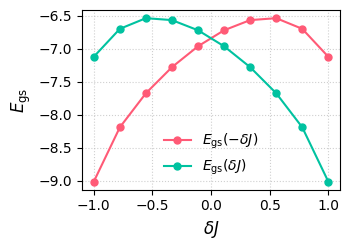

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(img_w, img_h))

# Mirrored data — lampone
plt.plot(
    [-dj for dj in deltaJs],
    [E_gs[dj] for dj in deltaJs],
    'o-',
    color='#FF5A76',  # raspberry
    label=r'$E_{\mathrm{gs}}(-\delta J)$',
    markersize=5,
    linewidth=1.5
)

# Original data — menta
plt.plot(
    deltaJs,
    [E_gs[dj] for dj in deltaJs],
    'o-',
    color='#00C2A0',  # mint
    label=r'$E_{\mathrm{gs}}(\delta J)$',
    markersize=5,
    linewidth=1.5
)

plt.xlabel(r'$\delta J$', fontsize=12)
plt.ylabel(r'$E_{\mathrm{gs}}$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(frameon=False, fontsize=10)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.savefig(f"{images_dir}/Egs_PBC_odd.png", dpi=300)
plt.show()

## c) Charge Gap

### 0.2 delta J

In [102]:
# varying params
L_list = [4,6,8]
U_list = [1,5,10]

# fixed params
deltaJ = 0.2

# saving dict
gaps = {}

for U in U_list:
    gaps[U] = {}
    for L in L_list:
        N = L // 2
        H_plus, _ = bosonic_ssh_hamiltonian(L=L, J=1.0, deltaJ=deltaJ, U=U, Nbosons=N+1, sps=N+2, BC="PBC")
        H_minus, _ = bosonic_ssh_hamiltonian(L=L, J=1.0, deltaJ=deltaJ, U=U, Nbosons=N-1, sps=N, BC="PBC")
        H, _ = bosonic_ssh_hamiltonian(L=L, J=1.0, deltaJ=deltaJ, U=U, Nbosons=N, sps=N+1, BC="PBC")

        E_plus, _ = H_plus.eigh()
        E_minus, _ = H_minus.eigh()
        E, _ = H.eigh()

        E_gs_plus = E_plus[0]
        E_gs_minus = E_minus[0]
        E_gs = E[0]

        gap = E_gs_plus + E_gs_minus - 2 * E_gs
        
        gaps[U][L] = gap

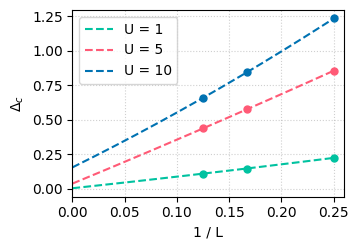

In [103]:
import matplotlib.pyplot as plt
import numpy as np

color_palette = ['#00C2A0', '#FF5A76', '#0072B2']

# Dimensioni compatte in stile Elia
img_w, img_h = 3.6, 2.6
plt.figure(figsize=(img_w, img_h))

# Compute 1/L
inv_L = np.array([1 / L for L in L_list])
inv_L_fine = np.linspace(0, max(inv_L), 300)

for i, U in enumerate(U_list):
    y = np.array([gaps[U][L] for L in L_list])
    
    # Fit quadratico
    coeffs = np.polyfit(inv_L, y, 2)
    fit_fn = np.poly1d(coeffs)
    
    color = color_palette[i % len(color_palette)]
    
    # Dati originali
    plt.plot(inv_L, y, 'o', color=color, markersize=5)
    # Fit
    plt.plot(inv_L_fine, fit_fn(inv_L_fine), '--', color=color, label=f'U = {U}')

plt.xlabel('1 / L')
plt.ylabel(r'$\Delta_c$')
plt.xlim(0, 0.26)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.savefig(f"{images_dir}/fit_deltaj_02.png", dpi=300)
plt.show()

In [104]:
# varying params
L_list = [4,6,8]
U_list = np.linspace(0, 20, 20)

# fixed params
deltaJ = 0.2

# saving dict
gaps = {}

for U in U_list:
    gaps[U] = {}
    for L in L_list:
        N = L // 2
        H_plus, _ = bosonic_ssh_hamiltonian(L=L, J=1.0, deltaJ=deltaJ, U=U, Nbosons=N+1, sps=N+2, BC="PBC")
        H_minus, _ = bosonic_ssh_hamiltonian(L=L, J=1.0, deltaJ=deltaJ, U=U, Nbosons=N-1, sps=N, BC="PBC")
        H, _ = bosonic_ssh_hamiltonian(L=L, J=1.0, deltaJ=deltaJ, U=U, Nbosons=N, sps=N+1, BC="PBC")

        E_plus, _ = H_plus.eigh()
        E_minus, _ = H_minus.eigh()
        E, _ = H.eigh()

        E_gs_plus = E_plus[0]
        E_gs_minus = E_minus[0]
        E_gs = E[0]

        gap = E_gs_plus + E_gs_minus - 2 * E_gs
        
        gaps[U][L] = gap

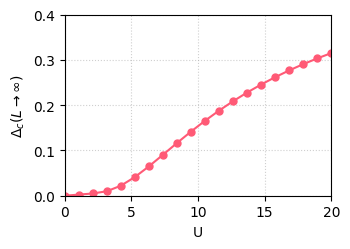

In [105]:
color_gap = '#FF5A76'  # rosa lampone

inv_L = np.array([1 / L for L in L_list])
gap_at_infty = []

for U in U_list:
    y = np.array([gaps[U][L] for L in L_list])
    coeffs = np.polyfit(inv_L, y, 2)
    gap_L_inf = coeffs[-1]  # termine costante
    gap_at_infty.append(gap_L_inf)

plt.figure(figsize=(img_w, img_h ))  # proporzioni compatte
plt.plot(U_list, gap_at_infty, 'o-', color=color_gap, markersize=5)

plt.xlabel('U')
plt.ylabel(r'$\Delta_c(L \to \infty)$')
plt.ylim(0, 0.4)
plt.xlim(0, 20)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.savefig(f"{images_dir}/phase_trans_deltaj_02.png", dpi=300)
plt.show()

### 0.6 delta J

In [106]:
# varying params
L_list = [4,6,8]
U_list = [1,5,10]

# fixed params
deltaJ = 0.6

# saving dict
gaps = {}

for U in U_list:
    gaps[U] = {}
    for L in L_list:
        N = L // 2
        H_plus, _ = bosonic_ssh_hamiltonian(L=L, J=1.0, deltaJ=deltaJ, U=U, Nbosons=N+1, sps=N+2, BC="PBC")
        H_minus, _ = bosonic_ssh_hamiltonian(L=L, J=1.0, deltaJ=deltaJ, U=U, Nbosons=N-1, sps=N, BC="PBC")
        H, _ = bosonic_ssh_hamiltonian(L=L, J=1.0, deltaJ=deltaJ, U=U, Nbosons=N, sps=N+1, BC="PBC")

        E_plus, _ = H_plus.eigh()
        E_minus, _ = H_minus.eigh()
        E, _ = H.eigh()

        E_gs_plus = E_plus[0]
        E_gs_minus = E_minus[0]
        E_gs = E[0]

        gap = E_gs_plus + E_gs_minus - 2 * E_gs
        
        gaps[U][L] = gap

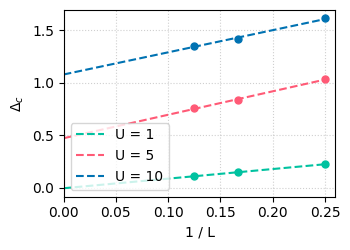

In [107]:
color_palette = ['#00C2A0', '#FF5A76', '#0072B2']  # menta, lampone, blu mare

# Compute 1/L
inv_L = np.array([1 / L for L in L_list])
inv_L_fine = np.linspace(0, max(inv_L), 300)

plt.figure(figsize=(img_w, img_h ))  # stile compatto

for i, U in enumerate(U_list):
    y = np.array([gaps[U][L] for L in L_list])
    
    # Fit lineare
    coeffs = np.polyfit(inv_L, y, 1)
    fit_fn = np.poly1d(coeffs)
    
    color = color_palette[i % len(color_palette)]
    
    # Dati originali
    plt.plot(inv_L, y, 'o', color=color, markersize=5)
    # Fit
    plt.plot(inv_L_fine, fit_fn(inv_L_fine), '--', color=color, label=f'U = {U}')

plt.xlabel('1 / L')
plt.ylabel(r'$\Delta_c$')
plt.xlim(0, 0.26)
plt.legend()
plt.legend(loc='lower left')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.savefig(f"{images_dir}/fit_deltaj_06.png", dpi=300)
plt.show()

In [108]:
# varying params
L_list = [4,6,8]
U_list = np.linspace(0, 20, 20)

# fixed params
deltaJ = 0.6

# saving dict
gaps = {}

for U in U_list:
    gaps[U] = {}
    for L in L_list:
        N = L // 2
        H_plus, _ = bosonic_ssh_hamiltonian(L=L, J=1.0, deltaJ=deltaJ, U=U, Nbosons=N+1, sps=N+2, BC="PBC")
        H_minus, _ = bosonic_ssh_hamiltonian(L=L, J=1.0, deltaJ=deltaJ, U=U, Nbosons=N-1, sps=N, BC="PBC")
        H, _ = bosonic_ssh_hamiltonian(L=L, J=1.0, deltaJ=deltaJ, U=U, Nbosons=N, sps=N+1, BC="PBC")

        E_plus, _ = H_plus.eigh()
        E_minus, _ = H_minus.eigh()
        E, _ = H.eigh()

        E_gs_plus = E_plus[0]
        E_gs_minus = E_minus[0]
        E_gs = E[0]

        gap = E_gs_plus + E_gs_minus - 2 * E_gs
        
        gaps[U][L] = gap

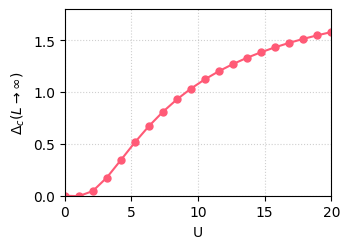

In [109]:
color_gap = '#FF5A76'  # rosa lampone

inv_L = np.array([1 / L for L in L_list])
gap_at_infty = []

for U in U_list:
    y = np.array([gaps[U][L] for L in L_list])
    coeffs = np.polyfit(inv_L, y, 1)
    gap_L_inf = coeffs[-1]  # termine costante
    gap_at_infty.append(gap_L_inf)

plt.figure(figsize=(img_w, img_h))  # compatto
plt.plot(U_list, gap_at_infty, 'o-', color=color_gap, markersize=5)

plt.xlabel('U')
plt.ylabel(r'$\Delta_c(L \to \infty)$')
plt.ylim(0, 1.8)
plt.xlim(0, 20)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.savefig(f"{images_dir}/phase_trans_deltaj_06.png", dpi=300)
plt.show()

## d) Local Density Profile

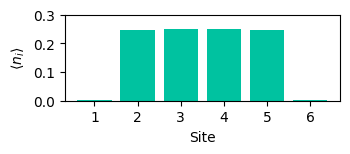

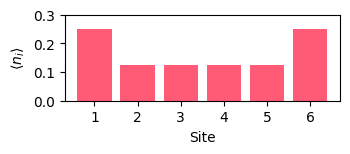

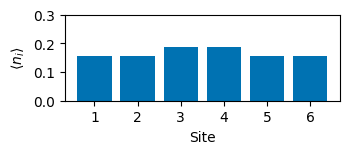

In [110]:
# Colori personalizzati per i tre grafici
bar_colors = ['#00C2A0', '#FF5A76', '#0072B2']  # menta, rosa lampone, blu navy

L = 6
N = (L // 2) + 1
sps = N + 1

params = [
    (-0.9, 2),   # deltaJ, U
    (-0.9, 30),
    (+0.9, 30)
]

labels = [
    r'$\delta J = -0.7,\ U = 2$',
    r'$\delta J = -0.7,\ U = 30$',
    r'$\delta J = +0.7,\ U = 30$'
]

for i, (deltaJ, U) in enumerate(params):
    H_obc, basis_obc = bosonic_ssh_hamiltonian(
        L=L, J=1.0, deltaJ=deltaJ, U=U, Nbosons=N, sps=sps, BC="OBC"
    )
    E_obc, V_obc = H_obc.eigh()
    gs_obc = V_obc[:, 0]
    
    n_avg_obc = np.array([
        hamiltonian([["n", [[1.0, j]]]], [], basis=basis_obc).expt_value(gs_obc) for j in range(L)
    ]) / N

    x = np.arange(L)
    plt.figure(figsize=(img_w, img_h / 1.5))
    plt.bar(x + 1, n_avg_obc, color=bar_colors[i])
    plt.ylim(0, 0.3)
    plt.ylabel(r'$\langle n_i \rangle$')
    plt.xlabel('Site')
    plt.xticks(x + 1)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f"{images_dir}/avg_boson_num_{i}.png", dpi=300)
    plt.show()

In [111]:
L = 6
N = (L // 2) + 1

deltaJ_list = np.round(np.linspace(-0.9, 0.9, 21), 2)
U_list = np.round(np.linspace(0, 20, 20), 2)

stds = np.zeros((len(U_list), len(deltaJ_list)))
means = np.zeros((len(U_list), len(deltaJ_list)))

for i, U in enumerate(U_list):
    for j, deltaJ in enumerate(deltaJ_list):
        # build Hamiltonian and basis
        H_obc, basis_obc = bosonic_ssh_hamiltonian(L=L, J=1.0, deltaJ=deltaJ, U=U, Nbosons=N, sps=N+1, BC="OBC")
        E_obc, V_obc = H_obc.eigh()
        gs_obc = V_obc[:, 0]

        # compute average occupations
        n_avg_obc = np.array([hamiltonian([["n", [[1.0, i]]]], [], basis=basis_obc).expt_value(gs_obc) for i in range(L)]) / N

        # Assuming d is your numpy array of probabilities
        x = np.arange(L)+1      # possible values of X
        mean = np.sum(x * n_avg_obc)       # expected value E[X]
        variance = np.sum((x - mean)**2 * n_avg_obc)  
        std_dev = np.sqrt(variance)  # standard deviation


        stds[i, j] = std_dev
        means[i, j] = mean

/var/folders/35/9ww2n_n554s25_5x1fsr8s700000gn/T/ipykernel_1927/3788265013.py:27: ComplexWarning: Casting complex values to real discards the imaginary part
  stds[i, j] = std_dev
/var/folders/35/9ww2n_n554s25_5x1fsr8s700000gn/T/ipykernel_1927/3788265013.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  means[i, j] = mean


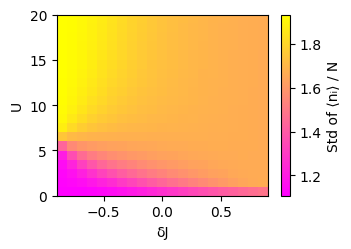

In [112]:
plt.figure(figsize=(img_w, img_h))
im = plt.imshow(stds, aspect='auto', origin='lower', 
                extent=[deltaJ_list[0], deltaJ_list[-1], U_list[0], U_list[-1]],
                cmap='spring')

plt.colorbar(im, label='Std of ⟨nᵢ⟩ / N')
plt.xlabel('δJ')
plt.ylabel('U')
#plt.title('Standard Deviation of Normalized Site Occupation ⟨nᵢ⟩/N')
#plt.xticks(deltaJ_list[::2])  # optional: skip some ticks for clarity
#plt.yticks(U_list)
plt.tight_layout()
plt.savefig(f"{images_dir}/phase_diagram.png", dpi=300)

plt.show()